### Початкова мережа для стану t0

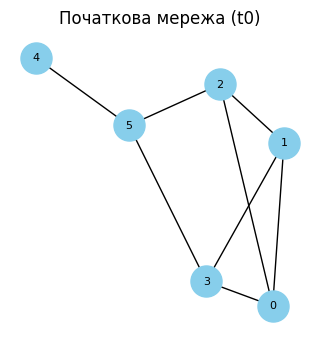

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, title, pos=None):
    plt.figure(figsize=(3, 3))
    if pos is None:
        pos = nx.spring_layout(graph)  
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8)
    plt.title(title)
    plt.show()

G_t0 = nx.erdos_renyi_graph(n=6, p=0.4)  
visualize_graph(G_t0, "Початкова мережа (t0)")

### Побудова мереж

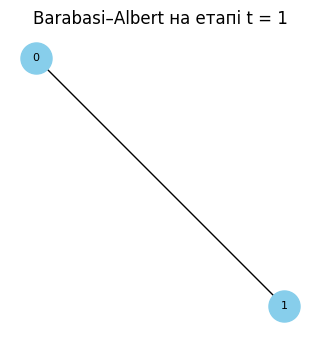

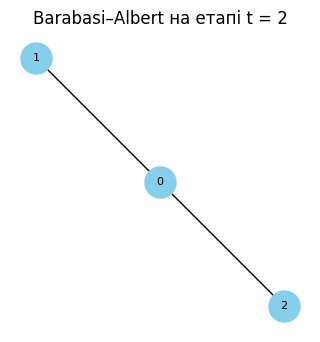

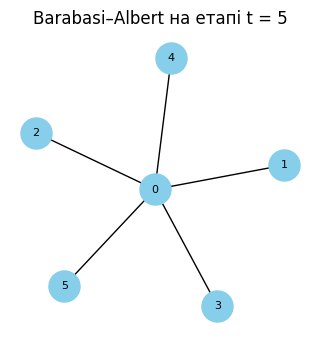

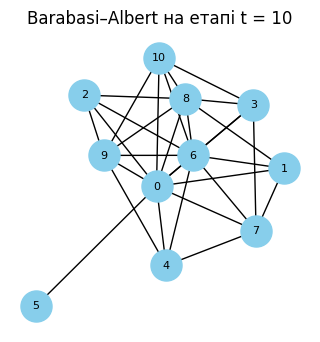

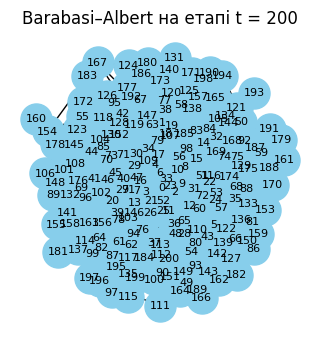

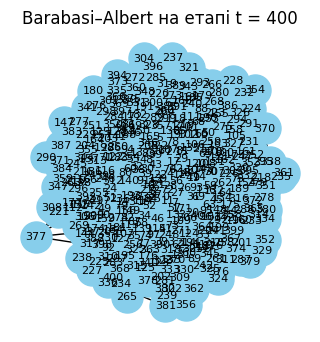

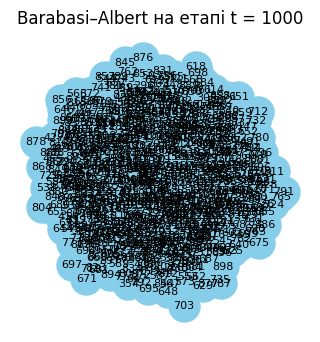

In [2]:
# Масштабно-інваріантна мережа
ba_graph = nx.barabasi_albert_graph(n=900, m=5)

steps = [1, 2, 5, 10, 200, 400, 1000]

for t in steps:
    subgraph = ba_graph.subgraph(range(t + 1))
    visualize_graph(subgraph, f"Barabasi–Albert на етапі t = {t}")

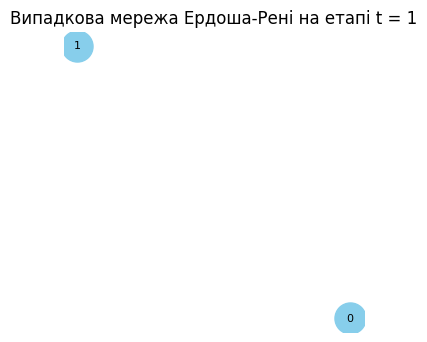

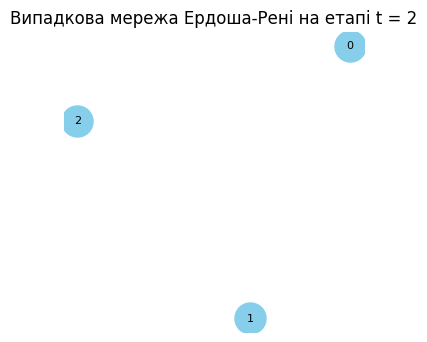

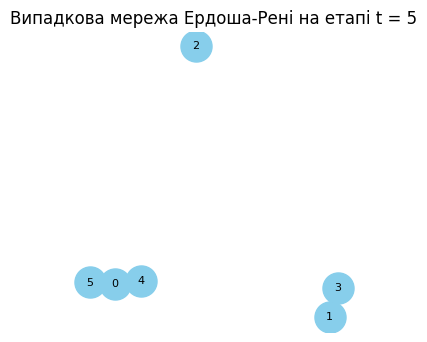

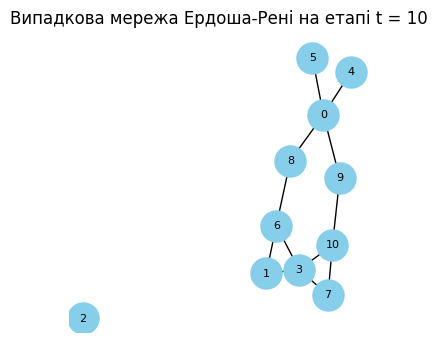

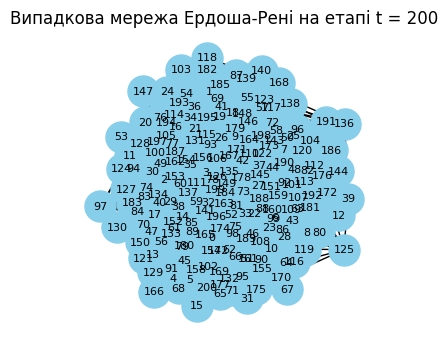

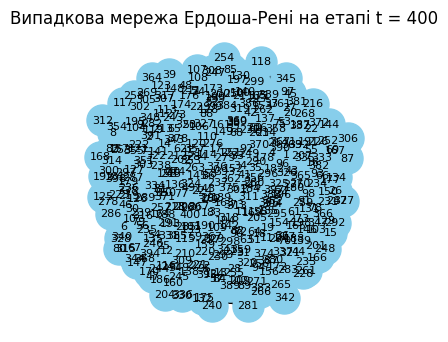

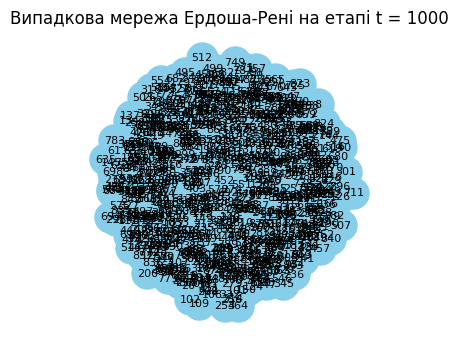

In [3]:
# Випадкова мережа Ердоша-Рені
random_graph = nx.erdos_renyi_graph(n=900, p=0.15)

for t in steps:
    subgraph = random_graph.subgraph(range(t + 1))
    visualize_graph(subgraph, f"Випадкова мережа Ердоша-Рені на етапі t = {t}")

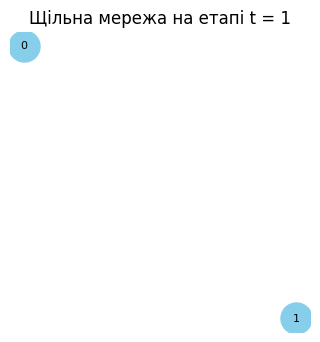

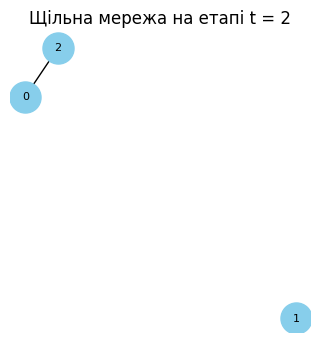

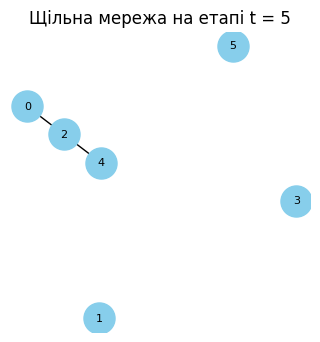

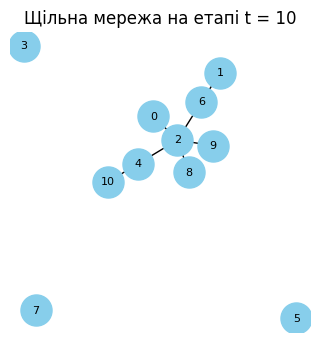

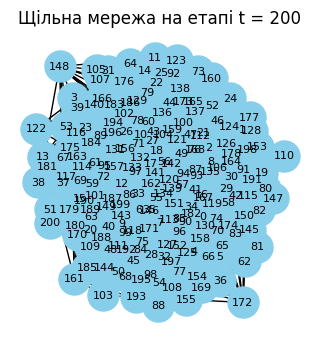

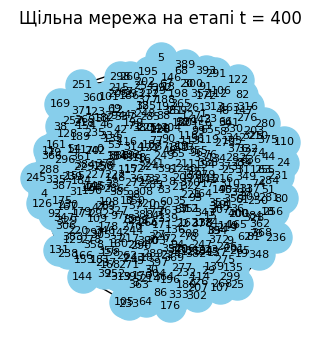

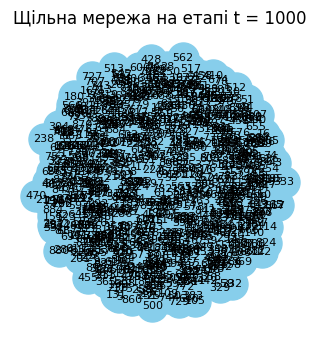

In [4]:
# Щільна мережа
dense_graph = nx.dense_gnm_random_graph(n=900, m=50000) 

for t in steps:
    subgraph = dense_graph.subgraph(range(t + 1))
    visualize_graph(subgraph, f"Щільна мережа на етапі t = {t}")

### Результат розподілу

In [5]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Степеневий розподіл для різних мереж
degree_sequence_ba = sorted([d for n, d in ba_graph.degree()], reverse=True)
degree_sequence_random = sorted([d for n, d in random_graph.degree()], reverse=True)
degree_sequence_dense = sorted([d for n, d in dense_graph.degree()], reverse=True)

def plot_log_binned_distribution(min_comments, ax, title, degree_sequence):
    filtered_degrees = [d for d in degree_sequence if d >= min_comments]
    
    # Лог-бінінг
    bins = np.logspace(np.log10(min(filtered_degrees)), np.log10(max(filtered_degrees)), num=20)
    hist, edges = np.histogram(filtered_degrees, bins=bins, density=True)
    bin_centers = 0.5 * (edges[1:] + edges[:-1])
    
    non_zero_mask = hist > 0
    bin_centers = bin_centers[non_zero_mask]
    hist = hist[non_zero_mask]
    
    ax.plot(bin_centers, hist, 'o', markersize=8, color='r', label=f'comments >= {min_comments}')
    
    # Сплайн
    x_smooth = np.logspace(np.log10(min(bin_centers)), np.log10(max(bin_centers)), 200)
    spline = make_interp_spline(np.log10(bin_centers), np.log10(hist), k=3)
    y_smooth = spline(np.log10(x_smooth))
    
    # Сплайн-фіт
    ax.plot(x_smooth, 10**y_smooth, linestyle='-', color='b', label=f'Сплайн фіт')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--")
    ax.set_xlabel('Node Degree k')
    ax.set_ylabel('Number of Nodes')
    ax.legend()
    ax.set_title(title)

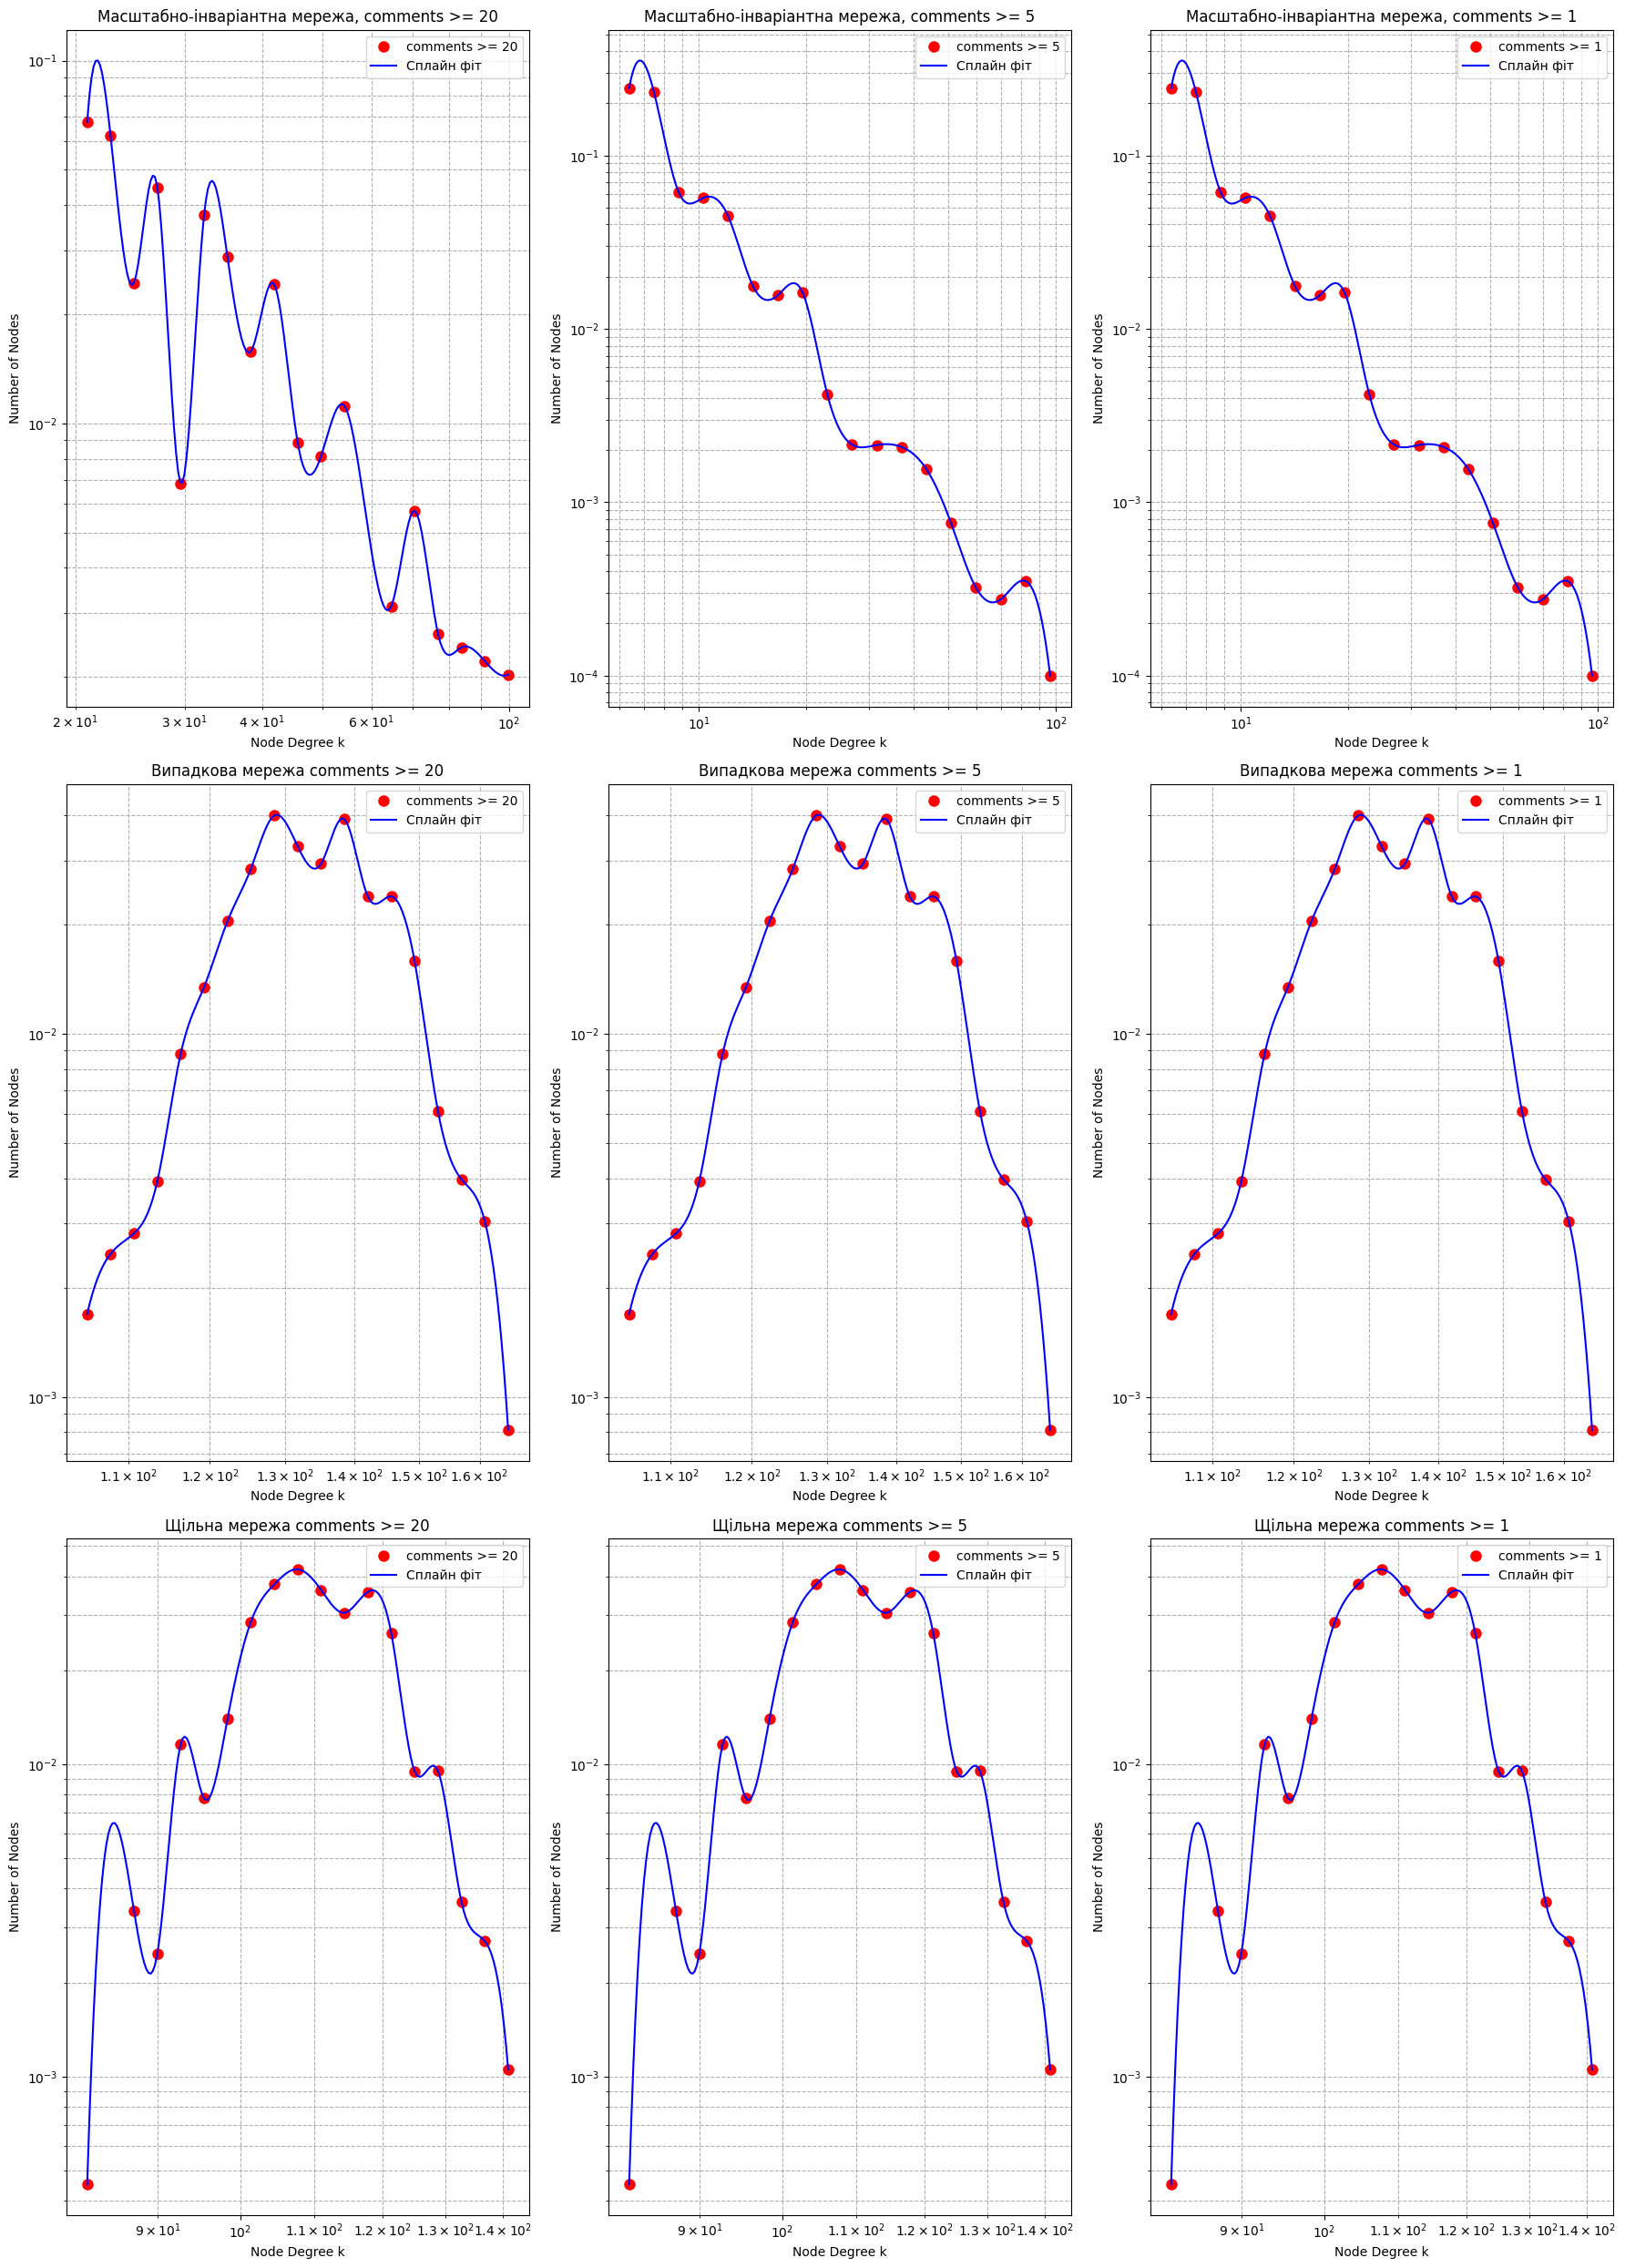

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(18, 25))
axs = axs.flatten()

thresholds = [20, 5, 1]

for i, th in enumerate(thresholds):
    plot_log_binned_distribution(th, axs[i], f'Масштабно-інваріантна мережа, comments >= {th}', degree_sequence_ba)
    plot_log_binned_distribution(th, axs[i + 3], f'Випадкова мережа comments >= {th}', degree_sequence_random)
    plot_log_binned_distribution(th, axs[i + 6], f'Щільна мережа comments >= {th}', degree_sequence_dense)

plt.tight_layout()
plt.show()